In [4]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# 读取文件
sains = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/sainsburys.json')
tesco = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/tesco.json')
waitrose = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/waitrose.json')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 数据截取

看趋势

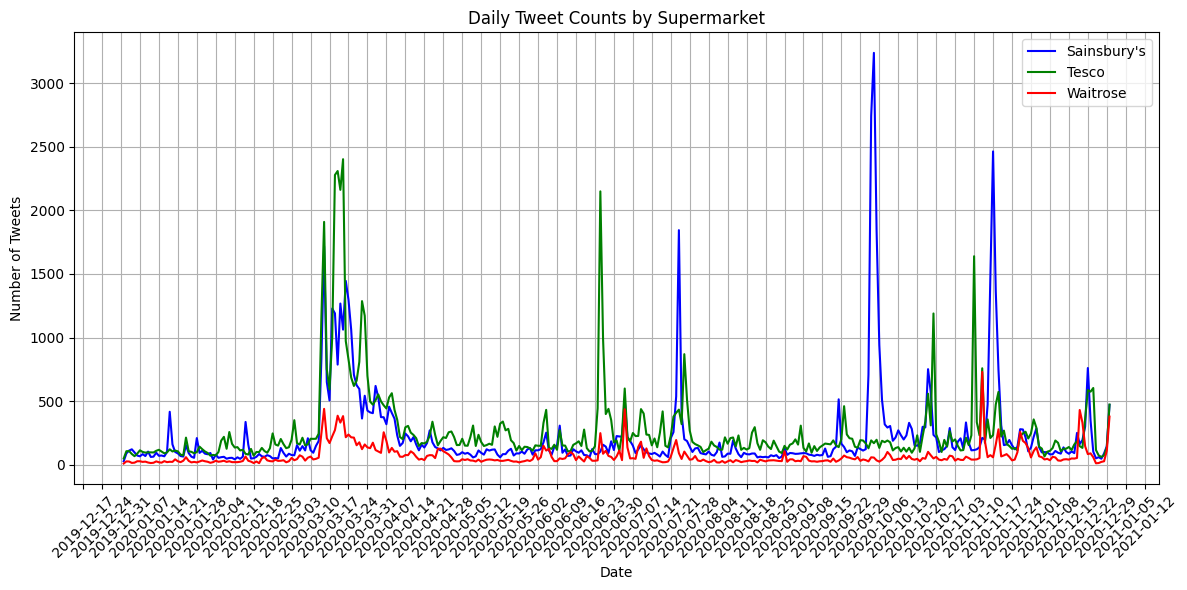

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 定义一个函数来处理数据
def process_data(data):
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['date'] = data['created_at'].dt.date
    return data.groupby('date').size()

# 处理每个数据集
daily_tweets_sains = process_data(sains)
daily_tweets_tesco = process_data(tesco)
daily_tweets_waitrose = process_data(waitrose)

# 绘制图表
plt.figure(figsize=(12, 6))
ax = plt.gca()  # 获取当前轴

# 绘制每个超市的线图
daily_tweets_sains.plot(ax=ax, kind='line', linestyle='-', color='blue', label='Sainsbury\'s')
daily_tweets_tesco.plot(ax=ax, kind='line', linestyle='-', color='green', label='Tesco')
daily_tweets_waitrose.plot(ax=ax, kind='line', linestyle='-', color='red', label='Waitrose')

# 设置日期格式化和间隔
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # 每周显示一次
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 设置日期格式

# 图表标题和标签
plt.title('Daily Tweet Counts by Supermarket')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转日期标签以便阅读
plt.legend()  # 显示图例
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


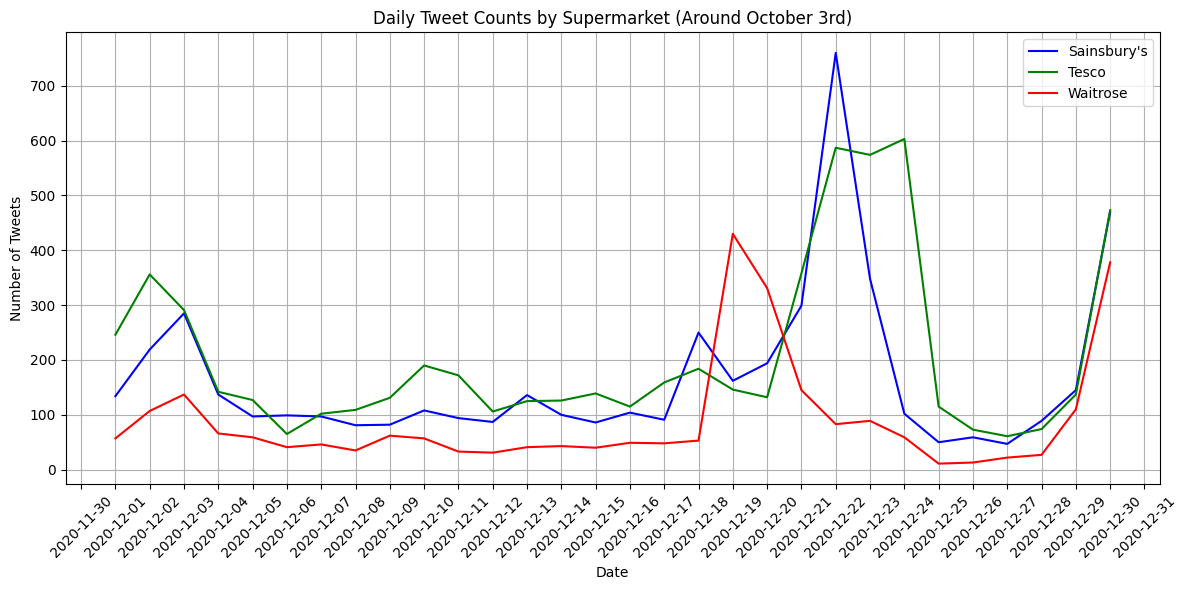

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 定义一个函数来处理数据
def process_data(data, start_date, end_date):
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['date'] = data['created_at'].dt.date
    start_date = pd.to_datetime(start_date).date()  # 转换开始日期为datetime.date对象
    end_date = pd.to_datetime(end_date).date()      # 转换结束日期为datetime.date对象
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    return filtered_data

# 设置开始和结束日期
start_date = '2020-12-01'
end_date = '2020-12-30'

# 处理每个数据集
daily_tweets_sains = process_data(sains, start_date, end_date)
daily_tweets_tesco = process_data(tesco, start_date, end_date)
daily_tweets_waitrose = process_data(waitrose, start_date, end_date)

# 绘制图表
plt.figure(figsize=(12, 6))
ax = plt.gca()  # 获取当前轴

# 绘制每个超市的线图
daily_tweets_sains.groupby('date').size().plot(ax=ax, kind='line', linestyle='-', color='blue', label='Sainsbury\'s')
daily_tweets_tesco.groupby('date').size().plot(ax=ax, kind='line', linestyle='-', color='green', label='Tesco')
daily_tweets_waitrose.groupby('date').size().plot(ax=ax, kind='line', linestyle='-', color='red', label='Waitrose')

# 设置日期格式化和间隔
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # 设置每天显示一次
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 设置日期格式


# 图表标题和标签
plt.title('Daily Tweet Counts by Supermarket (Around October 3rd)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转日期标签以便阅读
plt.legend()  # 显示图例
plt.tight_layout()
plt.show()


趋同趋势 都艾特了 所以 挑出相对存在差异的地方

In [98]:
import pandas as pd

# Convert 'created_at' column to datetime if not already
tesco['created_at'] = pd.to_datetime(tesco['created_at'])

# Filter data for the specified date range
start_date = pd.to_datetime('2020-12-01')
end_date = pd.to_datetime('2020-12-29')
tesco_sub = tesco[(tesco['created_at'] >= start_date) & (tesco['created_at'] <= end_date)]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
# If you want to create a new dataset with the filtered data, you can do:
tesco_sub.to_csv('tesco_sub.csv', index=False)  # Save as CSV file without index


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


created_at                   id               id_str  \
4     2020-12-22 11:34:32  1341346379478740993  1341346379478740992   
11    2020-12-14 11:52:49  1338451879420899329  1338451879420899328   
42    2020-12-11 17:43:15  1337452904844812288  1337452904844812288   
90    2020-12-24 19:03:19  1342184097121234948  1342184097121234944   
100   2020-12-10 16:28:19  1337071658096537601  1337071658096537600   
...                   ...                  ...                  ...   
96653 2020-12-12 18:19:04  1337824304558469120  1337824304558469120   
96657 2020-12-22 20:41:06  1341483928188825603  1341483928188825600   
96678 2020-12-28 19:20:45  1343638034525384707  1343638034525384704   
96693 2020-12-23 22:37:55  1341875712626749444  1341875712626749440   
96698 2020-12-22 09:54:47  1341321276833599493  1341321276833599488   

                                                    text display_text_range  \
4      Any comment @Tesco ? British carrots proudly d...            [0, 98]   
11     Christmas Hamper donation today to @ThornhillP...           [0, 140]   
42     Thank you @Tesco for donating Christmas card t...           [0, 140]   
90     RT @jamesmurden: Please note: when ordering sp...               None   
100    @saucy_mahi @Tesco Chipotle sauce\nPeri Peri H...           [19, 98]   
...                                                  ...                ...   
96653  @davie5456 @Morrisons @sainsburys @Tesco They ...          [41, 130]   
96657  @south_eastone @CarolPoyerPeett @sainsburys @T...          [51, 111]   
96678  Getting my first ever home grocery delivery vi...               None   
96693     @jamesmurden @Tesco With me it is with Bananas           [20, 46]   
96698  RT @DCBMEP: I would like an explanation too @T...               None   

                                                  source  truncated  \
4      <a href="http://twitter.com/download/iphone" r...      False   
11     <a href="http://twitter.com/download/iphone" r...       True   
42     <a href="http://twitter.com/download/android" ...       True   
90     <a href="http://twitter.com/download/iphone" r...      False   
100    <a href="https://mobile.twitter.com" rel="nofo...      False   
...                                                  ...        ...   
96653  <a href="http://twitter.com/download/android" ...      False   
96657  <a href="https://mobile.twitter.com" rel="nofo...      False   
96678  <a href="http://twitter.com/download/iphone" r...      False   
96693  <a href="http://twitter.com/#!/download/ipad" ...      False   
96698  <a href="http://twitter.com/download/android" ...      False   

       in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
4                        NaN                        NaN                  NaN   
11                       NaN                        NaN                  NaN   
42                       NaN                        NaN                  NaN   
90                       NaN                        NaN                  NaN   
100             1.330225e+18               1.330225e+18         4.149226e+08   
...                      ...                        ...                  ...   
96653           1.337818e+18               1.337818e+18         3.111429e+09   
96657           1.341483e+18               1.341483e+18         1.004622e+18   
96678                    NaN                        NaN                  NaN   
96693           1.341470e+18               1.341470e+18         1.154598e+08   
96698                    NaN                        NaN                  NaN   

       ...   matching_rules possibly_sensitive  \
4      ...  [{'tag': None}]                1.0   
11     ...  [{'tag': None}]                0.0   
42     ...  [{'tag': None}]                0.0   
90     ...  [{'tag': None}]                NaN   
100    ...  [{'tag': None}]                NaN   
...    ...              ...                ...   
96653  ...  [{'tag': None}]                NaN   

In [171]:
tesco = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/tesco.json')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 数据清洗

In [166]:
# 检查是否存在缺失值
missing_values = tesco_sub.isnull().sum()
print(missing_values)

created_at                      0
id                              0
id_str                          0
text                            0
display_text_range           3088
source                          0
truncated                       0
in_reply_to_status_id        3590
in_reply_to_status_id_str    3590
in_reply_to_user_id          2848
in_reply_to_user_id_str      2848
in_reply_to_screen_name      2891
user                            0
geo                          5789
coordinates                  5789
place                        5681
contributors                 5796
is_quote_status                 0
quote_count                     0
reply_count                     0
retweet_count                   0
favorite_count                  0
entities                        0
favorited                       0
retweeted                       0
filter_level                    0
lang                            0
matching_rules                  0
possibly_sensitive           4798
extended_tweet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [172]:
tesco_sub = tesco_sub[['text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text
4      comment tesco british carrot proudli display u...
11     christma hamper donat today thornhillp tesco d...
42     thank tesco donat christma card send local car...
90     rt jamesmurden pleas note order sprout tesco o...
100    saucymahi tesco chipotl sauc peri peri hot sau...
...                                                  ...
96657  southeaston carolpoyerpeett sainsburi tesco ag...
96678  get first ever home groceri deliveri via tesco...
96693                           jamesmurden tesco banana
96698   rt dcbmep would like explan tesco trade descript
text                                                    

[5609 rows x 1 columns]

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
pip install text_preprocessing

In [174]:
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation

preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation]

# Define a function that applies all preprocessing functions to a text
def apply_preprocessing(text):
    for function in preprocess_functions:
        text = function(text)
    return text

# Apply the preprocessing function to each text entry in the DataFrame
tesco_sub['text'] = tesco_sub['text'].apply(apply_preprocessing)

# Display the processed text column
tesco_sub['text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-174-ad8d460cce4e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(apply_preprocessing)


4        comment tesco british carrot proudli display u...
11       christma hamper donat today thornhillp tesco d...
42       thank tesco donat christma card send local car...
90       rt jamesmurden pleas note order sprout tesco o...
100      saucymahi tesco chipotl sauc peri peri hot sau...
                               ...                        
96657    southeaston carolpoyerpeett sainsburi tesco ag...
96678    get first ever home groceri deliveri via tesco...
96693                             jamesmurden tesco banana
96698     rt dcbmep would like explan tesco trade descript
text                                                      
Name: text, Length: 5609, dtype: object

In [175]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
# new_stopwords = ["all", "due", "to", "on", "daily"]
# stpwrd.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: cleaning_stopwords(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-175-a8a713e62879>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(lambda x: cleaning_stopwords(x))


In [176]:
# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: remove_numbers(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-176-a29d59f2a99d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(lambda x: remove_numbers(x))


In [87]:
# Remove punctuations def remove_punctuations(data):
   # return re.sub(r'[^\w\s]', '', data)
#tesco_sub['text']= tesco_sub['text'].apply(lambda x: remove_punctuations(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [177]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: stemming_on_text(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-177-365fab6da182>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(lambda x: stemming_on_text(x))


In [178]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    # 确保数据是字符串
    if isinstance(data, str):
        # 应用词干分析
        text = [st.stem(word) for word in data.split()]
        return ' '.join(text)
    else:
        # 如果数据不是字符串，返回空字符串
        return ""
# 应用词干提取函数，同时处理空值和非字符串数据
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: stemming_on_text(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-178-0ee60f934c6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(lambda x: stemming_on_text(x))


In [179]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: lemmatizer_on_text(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-179-ceeff809c7b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesco_sub['text'] = tesco_sub['text'].apply(lambda x: lemmatizer_on_text(x))


In [180]:
def remove_emojis(text):
    # 使用广泛的Unicode范围来匹配和去除表情符号
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs

        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Additional emoticons
        u"\U00002500-\U00002BEF"  # Various symbols
        u"\U0001F680-\U0001F6FF"  # More transport and map symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags

        u"\U0001F1E6-\U0001F1FF"  # Flags
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
# 应用函数
tesco_sub.loc[:, 'text'] = tesco_sub['text'].apply(lambda x: remove_emojis(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
tesco_sub.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text
4    comment tesco british carrot proudli display u...
11   christma hamper donat today thornhillp tesco d...
42   thank tesco donat christma card send local car...
90   rt jamesmurden plea note order sprout tesco on...
100  saucymahi tesco chipotl sauc peri peri hot sau...

In [113]:
tesco_sub.to_csv('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/tesco_sub.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 情绪分析

In [215]:
tesco_sub=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/tesco_sub.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
!pip install vaderSentiment

In [182]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 初始化 VADER 分析器
analyzer = SentimentIntensityAnalyzer()

# 应用 VADER 分析到每条文本上，获取综合得分
tesco_sub['compound'] = tesco_sub['text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# 查看前几行数据确认情绪得分列已添加
print(tesco_sub[['text', 'compound']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                  text  compound
4    comment tesco british carrot proudli display u...    0.0000
11   christma hamper donat today thornhillp tesco d...    0.7096
42   thank tesco donat christma card send local car...    0.6908
90   rt jamesmurden plea note order sprout tesco on...    0.0000
100  saucymahi tesco chipotl sauc peri peri hot sau...    0.0000


In [183]:
tesco_new = pd.DataFrame({'text':tesco_sub['text'], 'sentiment_score':tesco_sub['compound']})
tesco_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text  sentiment_score
4      comment tesco british carrot proudli display u...           0.0000
11     christma hamper donat today thornhillp tesco d...           0.7096
42     thank tesco donat christma card send local car...           0.6908
90     rt jamesmurden plea note order sprout tesco on...           0.0000
100    saucymahi tesco chipotl sauc peri peri hot sau...           0.0000
...                                                  ...              ...
96657  southeaston carolpoyerpeett sainsburi tesco ag...          -0.6597
96678  get first ever home groceri deliveri via tesco...           0.0000
96693                           jamesmurden tesco banana           0.0000
96698   rt dcbmep would like explan tesco trade descript           0.3612
text                                                               0.0000

[5609 rows x 2 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


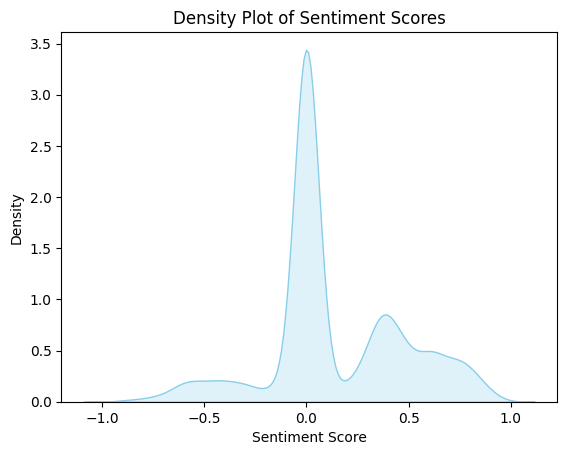

In [184]:
import seaborn as sns
sentiment_score = tesco_new['sentiment_score']
# 绘制密度图
sns.kdeplot(sentiment_score, color='skyblue', fill=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.show()

In [117]:
# 转换为 pandas 的 Series 对象
sentiment_series = pd.Series(sentiment_score)
# 计算描述性统计量
stats = sentiment_series.describe()
stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    5609.000000
mean        0.136800
std         0.334695
min        -0.911800
25%         0.000000
50%         0.000000
75%         0.381800
max         0.939300
Name: sentiment_score, dtype: float64

In [185]:
# 定义情绪评分的阈值
POSITIVE_THRESHOLD = 0.2
NEGATIVE_THRESHOLD = -0.2

# 根据阈值将情绪得分分别为积极、中性和消极
def classify_sentiment(score):
    if score >= POSITIVE_THRESHOLD:
        return 'positive'
    elif score <= NEGATIVE_THRESHOLD:
        return 'negative'
    else:
        return 'neutral'

tesco_new['Sentiment'] = tesco_new['sentiment_score'].apply(classify_sentiment)
tesco_new.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text  sentiment_score  \
4    comment tesco british carrot proudli display u...           0.0000   
11   christma hamper donat today thornhillp tesco d...           0.7096   
42   thank tesco donat christma card send local car...           0.6908   
90   rt jamesmurden plea note order sprout tesco on...           0.0000   
100  saucymahi tesco chipotl sauc peri peri hot sau...           0.0000   

    Sentiment  
4     neutral  
11   positive  
42   positive  
90    neutral  
100   neutral

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Sentiment Data Distribution')

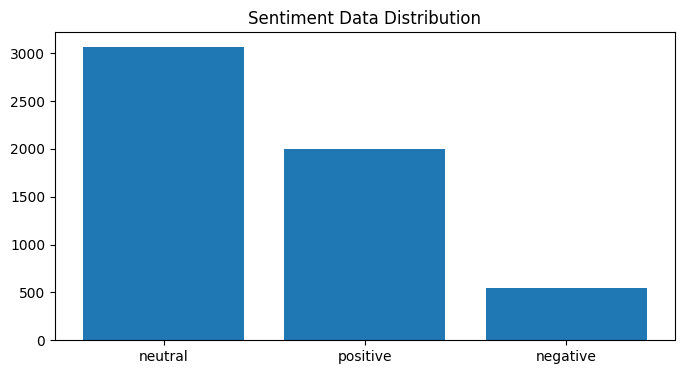

In [186]:
val_count = tesco_new.Sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


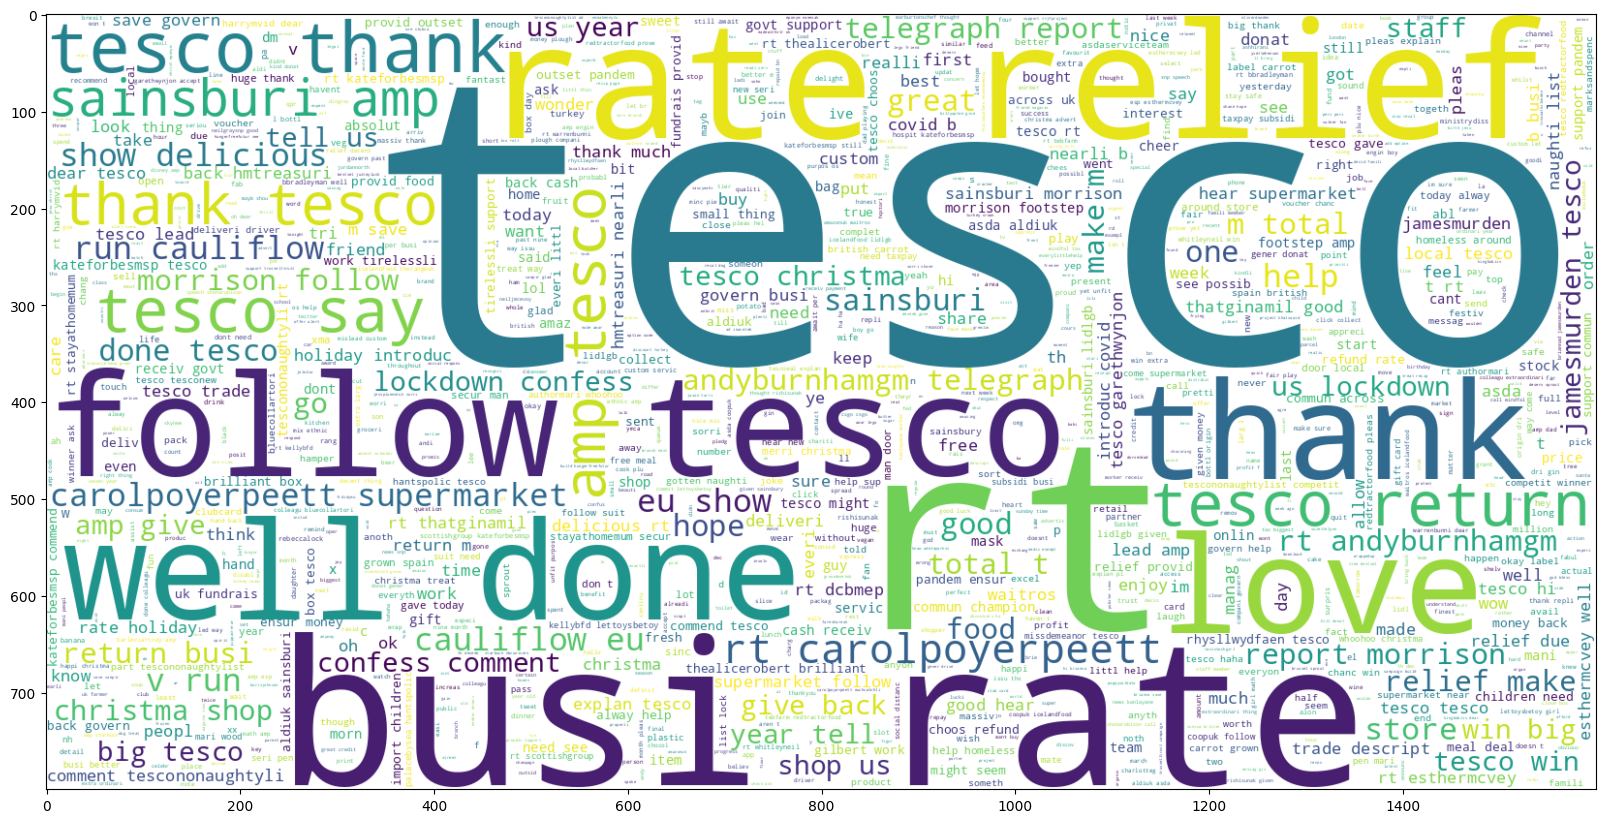

In [138]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


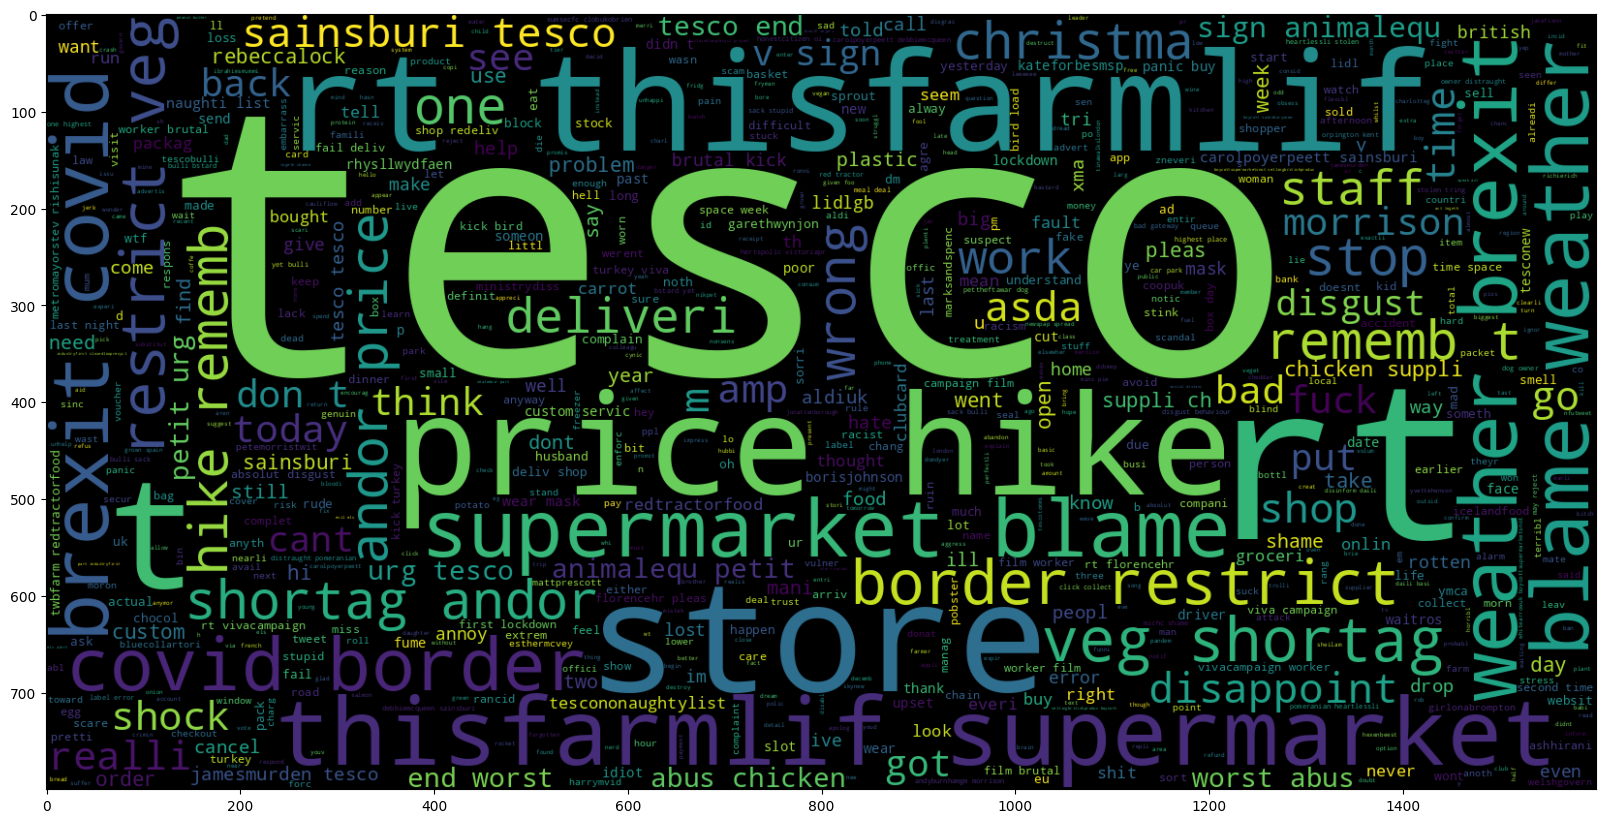

In [139]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

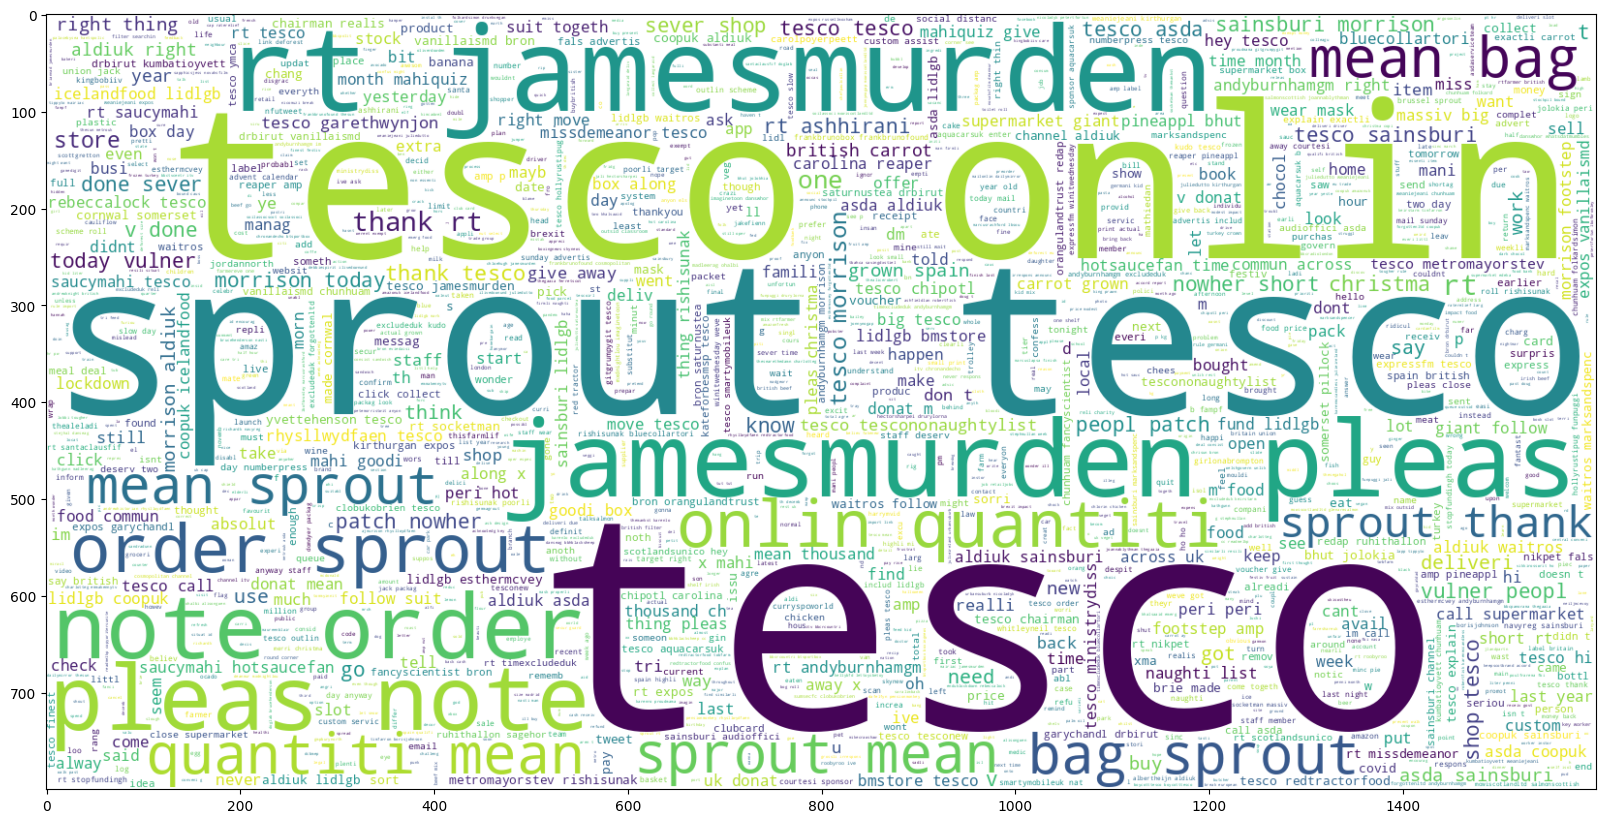

In [31]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'neutral'].text))
plt.imshow(wc , interpolation = 'bilinear')

二筛

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ["rt","tesco"]
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
tesco_new['text'] = tesco_new['text'].apply(lambda text: cleaning_stopwords(text))
tesco_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text  sentiment_score  \
4      comment british carrot proudli display union f...           0.0000   
11     christma hamper donat today thornhillp dunstab...           0.7096   
42     thank donat christma card send local care home...           0.6908   
90     jamesmurden plea note order sprout onlin quant...           0.0000   
100    saucymahi chipotl sauc peri peri hot sauc caro...           0.0000   
...                                                  ...              ...   
96657  southeaston carolpoyerpeett sainsburi agr andi...          -0.6597   
96678  get first ever home groceri deliveri via i’m w...           0.0000   
96693                                 jamesmurden banana           0.0000   
96698            dcbmep would like explan trade descript           0.3612   
text                                                               0.0000   

      Sentiment                                             tokens  
4       neutral  [comment, tesco, british, carrot, proudli, dis...  
11     positive  [christma, hamper, donat, today, thornhillp, t...  
42     positive  [thank, tesco, donat, christma, card, send, lo...  
90      neutral  [jamesmurden, plea, note, order, sprout, tesco...  
100     neutral  [saucymahi, tesco, chipotl, sauc, peri, peri, ...  
...         ...                                                ...  
96657  negative  [southeaston, carolpoyerpeett, sainsburi, tesc...  
96678   neutral  [get, first, ever, home, groceri, deliveri, vi...  
96693   neutral                       [jamesmurden, tesco, banana]  
96698  positive  [dcbmep, would, like, explan, tesco, trade, de...  
text    neutral                                                 []  

[5609 rows x 4 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


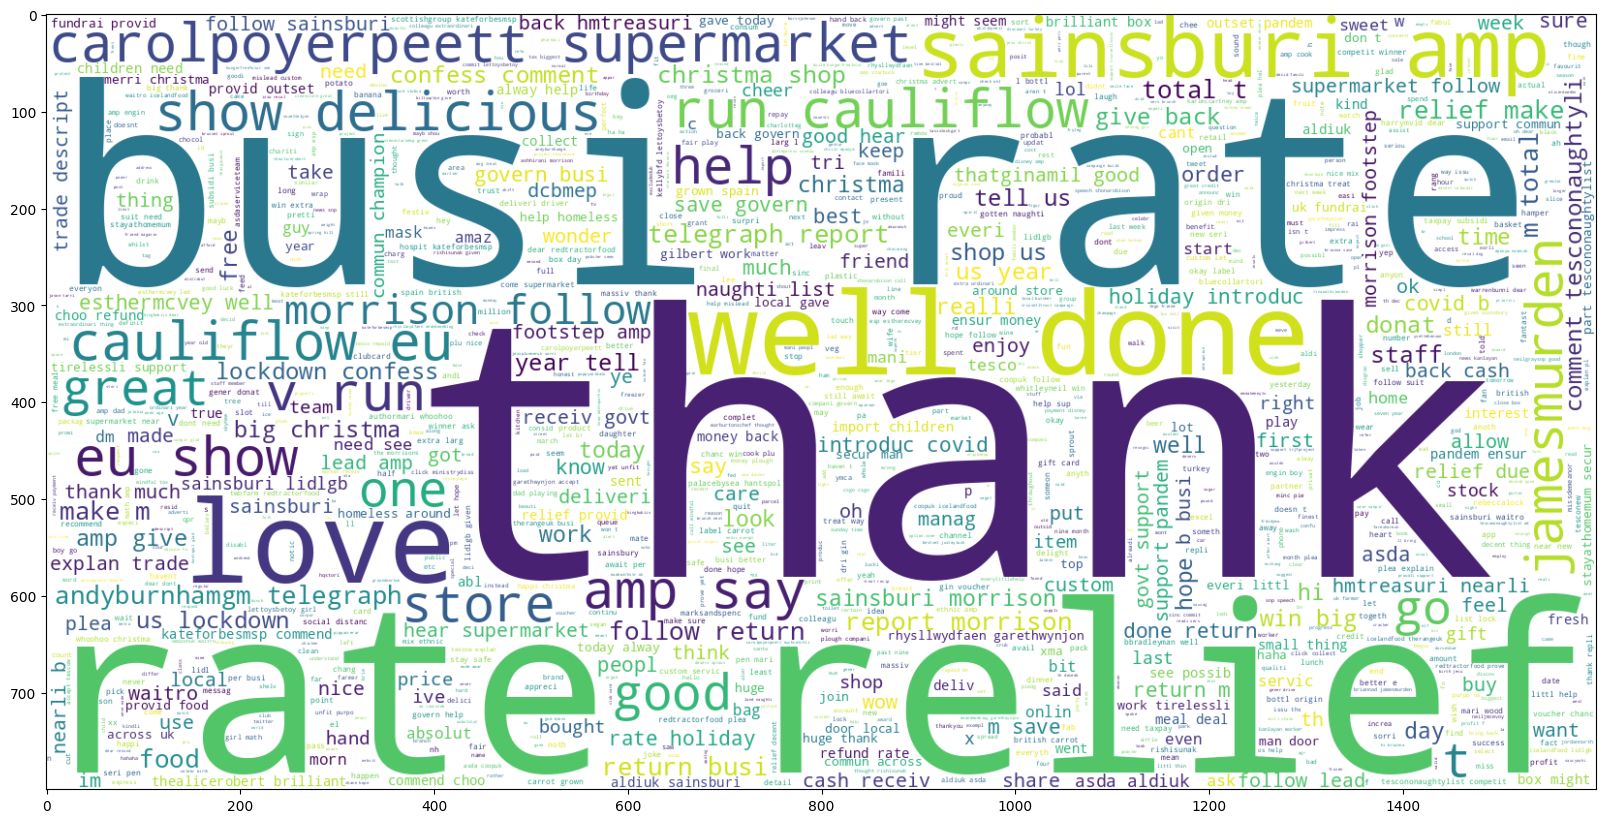

In [203]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


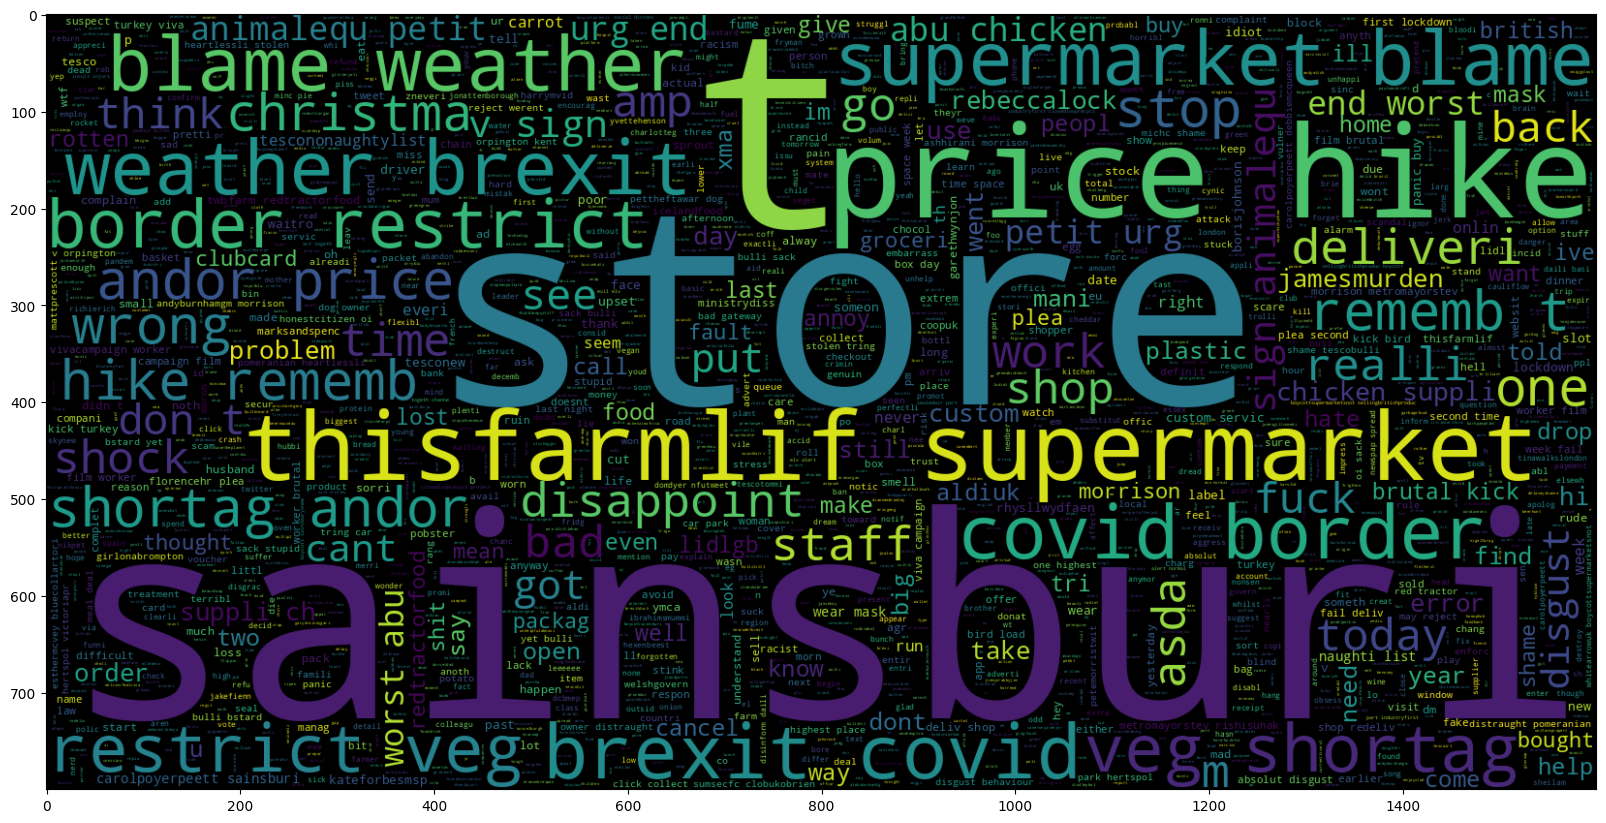

In [204]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

测试

In [166]:
# Separating the 70% data for training data and 30% for testing data
trainsize = 0.7
X = tesco_new['text']
y = tesco_new['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-trainsize,
                                         random_state=123) # Splits Dataset into Training and Testing set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
# TfidfVectorizer.fit_transform is used to create vocabulary from the training dataset
# TfidfVectorizer.transform is used to map that vocabulary to test dataset so that the number of features
# in test data remain same as train data.
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(2,2), max_features=500000)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training Accuracy : 0.9913397860417728
Test Accuracy : 0.7023172905525846
[[ 25 128  15]
 [  6 838  91]
 [  2 259 319]]


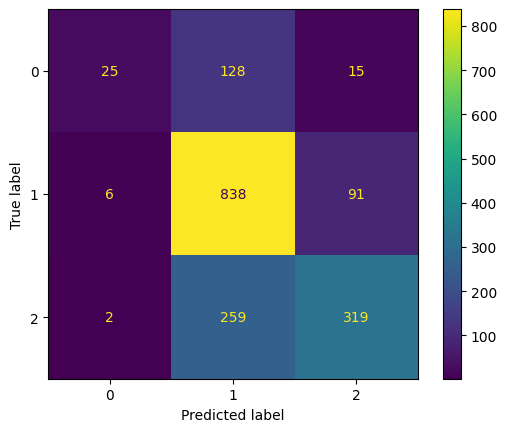

In [168]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

print("Training Accuracy :", model_NB.score(X_train, y_train))
print("Test Accuracy :", model_NB.score(X_test, y_test))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training Accuracy : 0.9921039225674987
Test Accuracy : 0.7011289364230541
[[ 22 142   4]
 [  0 924  11]
 [  0 346 234]]


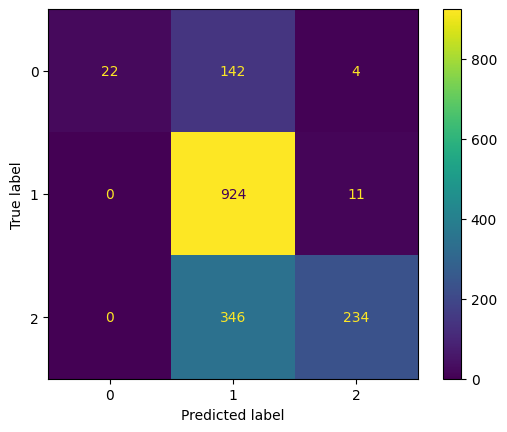

In [169]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# LDA

In [40]:
!pip install contractions

In [41]:
!pip install pyLDAvis

In [42]:
import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [205]:
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         # if word != '' and word not in stop_words:
        if word!='':
           words.append(word)
    return words

tesco_new['tokens']=tesco_new.text.apply(generate_tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [206]:
tesco_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text  sentiment_score  \
4      comment british carrot proudli display union f...           0.0000   
11     christma hamper donat today thornhillp dunstab...           0.7096   
42     thank donat christma card send local care home...           0.6908   
90     jamesmurden plea note order sprout onlin quant...           0.0000   
100    saucymahi chipotl sauc peri peri hot sauc caro...           0.0000   
...                                                  ...              ...   
96657  southeaston carolpoyerpeett sainsburi agr andi...          -0.6597   
96678  get first ever home groceri deliveri via i’m w...           0.0000   
96693                                 jamesmurden banana           0.0000   
96698            dcbmep would like explan trade descript           0.3612   
text                                                               0.0000   

      Sentiment                                             tokens  
4       neutral  [comment, british, carrot, proudli, display, u...  
11     positive  [christma, hamper, donat, today, thornhillp, d...  
42     positive  [thank, donat, christma, card, send, local, ca...  
90      neutral  [jamesmurden, plea, note, order, sprout, onlin...  
100     neutral  [saucymahi, chipotl, sauc, peri, peri, hot, sa...  
...         ...                                                ...  
96657  negative  [southeaston, carolpoyerpeett, sainsburi, agr,...  
96678   neutral  [get, first, ever, home, groceri, deliveri, vi...  
96693   neutral                              [jamesmurden, banana]  
96698  positive     [dcbmep, would, like, explan, trade, descript]  
text    neutral                                                 []  

[5609 rows x 4 columns]

In [151]:
tesco_new['tokens'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 0

In [207]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(tesco_new['tokens'])
print(id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<8947 unique tokens: ['british', 'carrot', 'comment', 'display', 'flag']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(sains_new['tokens'],id2word)
print(sains_new['tokens'][0])
print(corpus[0])

In [208]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(tesco_new['tokens'],id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=7,random_state=100,
                                             )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.196409 -0.260715       1        1  17.533275
6      0.034854  0.212417       2        1  15.974213
5     -0.094267 -0.132149       3        1  15.396071
0     -0.146295  0.154790       4        1  14.702012
3      0.179999  0.107791       5        1  13.237785
4      0.075023 -0.052327       6        1  11.992262
2     -0.245723 -0.029808       7        1  11.164382, topic_info=               Term         Freq        Total Category  logprob  loglift
38           sprout  1180.000000  1180.000000  Default  30.0000  30.0000
32             mean   804.000000   804.000000  Default  29.0000  29.0000
35            order   488.000000   488.000000  Default  28.0000  28.0000
30              bag   409.000000   409.000000  Default  27.0000  27.0000
33             note   384.000000   384.000000  Default  26.0000  26.0000
..              ...          ...          ...      ...      ...      ...
435  redtractorfood    20.433048    51.243782   Topic7  -5.6614   1.2730
279             get    25.397069   188.283827   Topic7  -5.4440   0.1891
327        deliveri    22.349555   111.267660   Topic7  -5.5718   0.5873
210        morrison    25.293849   373.736375   Topic7  -5.4480  -0.5005
64              one    21.069717   181.262049   Topic7  -5.6308   0.0403

[484 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1048      1  0.025549    across
1048      3  0.740932    across
1048      4  0.229944    across
764       1  0.033600   adverti
764       3  0.033600   adverti
...     ...       ...       ...
782       4  0.322299        £m
782       5  0.436052        £m
782       7  0.028438        £m
2370      3  0.903028  ‘british
1165      4  0.973668     ‘what

[1249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 6, 1, 4, 5, 3])

In [145]:
# 计算困惑度
perplexity = lda_model.log_perplexity(corpus)
print(f"Log perplexity of the LDA model: {perplexity}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Log perplexity of the LDA model: -9.228249826943582


In [338]:
pip install PyMuPDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [339]:
import os
import gensim
import nltk
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import fitz  # PyMuPDF

# Preprocess the documents
texts = sains_new['tokens'].tolist()

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Apply LDA
num_topics = 10  # Adjust as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.020*"need" + 0.019*"please" + 0.014*"hi" + 0.014*"stop" + 0.014*"today" + 0.011*"store" + 0.011*"daveatherton" + 0.011*"call" + 0.011*"children" + 0.010*"lobbying"
Topic: 1 
Words: 0.107*"want" + 0.071*"ocado" + 0.067*"food" + 0.064*"shop" + 0.064*"poorscousertom" + 0.060*"online" + 0.052*"bank" + 0.052*"add" + 0.051*"dear" + 0.050*"tab"
Topic: 2 
Words: 0.032*"supermarkets" + 0.028*"like" + 0.027*"amp" + 0.024*"say" + 0.022*"carolpoyerpeett" + 0.020*"run" + 0.018*"theyve" + 0.018*"show" + 0.017*"cauliflowers" + 0.017*"eu"
Topic: 3 
Words: 0.019*"dave" + 0.019*"kautosam" + 0.018*"tunny" + 0.017*"beanie" + 0.016*"luckyloader" + 0.016*"peterobinson" + 0.016*"rcbridgestock" + 0.015*"navyreg" + 0.015*"haynesgreyhound" + 0.014*"paulhorsesst"
Topic: 4 
Words: 0.024*"christmas" + 0.015*"going" + 0.015*"claudiandfin" + 0.014*"well" + 0.014*"people" + 0.012*"million" + 0.012*"thanks" + 0.012*"help" + 0.010*"donations" + 0.009*"staff"
Topic: 5 
Words: 0.022*"find" + 0.022*"ris

In [ ]:
for i, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)
    print(f"Document {i} Topics:")
    for topic, prob in doc_topics:
        print(f"Topic {topic}: {prob:.4f}")
    print("\n")

In [341]:
pip install nltk matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics: 1, Log Perplexity: -7.213535928665899
Number of Topics: 2, Log Perplexity: -7.135179381398039
Number of Topics: 3, Log Perplexity: -7.125169931511531
Number of Topics: 4, Log Perplexity: -7.140048491982337
Number of Topics: 5, Log Perplexity: -7.130792914625733
Number of Topics: 6, Log Perplexity: -7.144331638342682
Number of Topics: 7, Log Perplexity: -7.137113697681862
Number of Topics: 8, Log Perplexity: -7.1428625726821044
Number of Topics: 9, Log Perplexity: -7.13035571312706
Number of Topics: 10, Log Perplexity: -7.124274660788556
Number of Topics: 11, Log Perplexity: -7.299368845705307
Number of Topics: 12, Log Perplexity: -7.70594230485903
Number of Topics: 13, Log Perplexity: -7.982446805825248
Number of Topics: 14, Log Perplexity: -8.12787288103445
Number of Topics: 15, Log Perplexity: -8.251200381434725


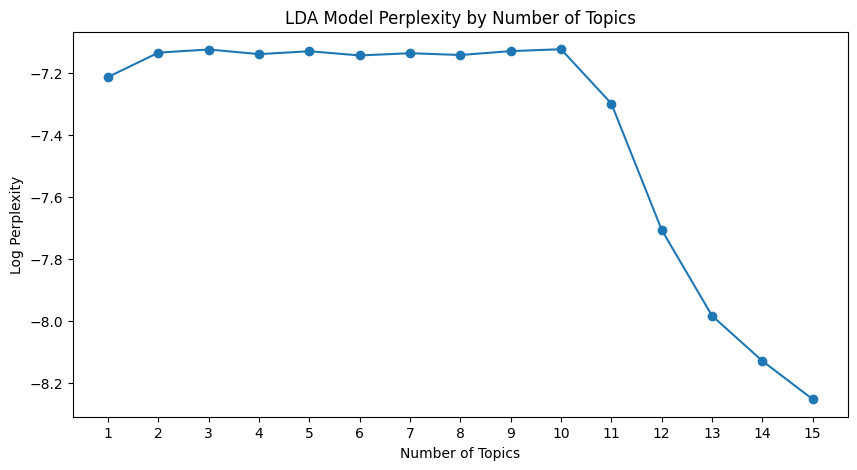

In [248]:
import matplotlib.pyplot as plt
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# 假设 corpus 和 id2word 已经被创建和初始化

def calculate_perplexities(corpus, id2word, max_topics):
    topic_range = range(1, max_topics + 1)
    perplexities = []

    for num_topics in topic_range:
        lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10)
        perplexity = lda_model.log_perplexity(corpus)
        perplexities.append(perplexity)
        print(f"Number of Topics: {num_topics}, Log Perplexity: {perplexity}")

    return topic_range, perplexities

# 最大主题数
max_topics = 15
topic_range, perplexities = calculate_perplexities(corpus, id2word, max_topics)

# 绘制困惑度曲线
plt.figure(figsize=(10, 5))
plt.plot(topic_range, perplexities, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Log Perplexity')
plt.title('LDA Model Perplexity by Number of Topics')
plt.xticks(topic_range)
plt.show()


In [216]:
!pip install transformers torch

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Use pretrained model
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax

# Load pre-trained model and tokenizer
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

def sentiment_score(review_text):
    # Encode the text
    encoded_review = tokenizer.encode_plus(
        review_text,
        max_length=512,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    # Forward pass, get logits
    input_ids = encoded_review['input_ids'].to('cpu')
    attention_mask = encoded_review['attention_mask'].to('cpu')

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

    return scores

# Example tweets
tweets = tesco_sub["text"]
# Get sentiment scores for each tweet
for tweet in tweets:
    scores = sentiment_score(tweet)

    print(f'Tweet: "{tweet}"')
    print(f'Scores: {scores}')

# 新段落

In [218]:
tweets = tesco_sub["text"]
tweets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       comment tesco british carrot proudli display u...
1       christma hamper donat today thornhillp tesco d...
2       thank tesco donat christma card send local car...
3       rt jamesmurden pleas note order sprout tesco o...
4       saucymahi tesco chipotl sauc peri peri hot sau...
                              ...                        
5604    southeaston carolpoyerpeett sainsburi tesco ag...
5605    get first ever home groceri deliveri via tesco...
5606                             jamesmurden tesco banana
5607     rt dcbmep would like explan tesco trade descript
5608                                                  NaN
Name: text, Length: 5609, dtype: object

In [223]:
# 检查是否存在缺失值
missing_values = tesco_sub.isnull().sum()
print(missing_values)

Unnamed: 0    0
text          0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
tesco_sub = tesco_sub.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ['rt']
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: cleaning_stopwords(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [274]:
tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text
0     comment tesco british carrot proudli display u...
1     christma hamper donat today thornhillp tesco d...
2     thank tesco donat christma card send local car...
3     jamesmurden pleas note order sprout tesco onli...
4     saucymahi tesco chipotl sauc peri peri hot sau...
...                                                 ...
5603  davi morrison sainsburi tesco make staff favou...
5604  southeaston carolpoyerpeett sainsburi tesco ag...
5605  get first ever home groceri deliveri via tesco...
5606                           jamesmurden tesco banana
5607      dcbmep would like explan tesco trade descript

[5608 rows x 1 columns]

In [226]:
# 删除 'Unnamed: 0' 列
tesco_sub = tesco_sub.drop('Unnamed: 0', axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [275]:
tesco_sub.to_csv("tescotrain.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [229]:
!pip install transformers torch

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [305]:
# Use pretrained model
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax

# Load pre-trained model and tokenizer
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

def sentiment_score(review_text):
    # Encode the text
    encoded_review = tokenizer.encode_plus(
        review_text,
        max_length=512,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    # Forward pass, get logits
    input_ids = encoded_review['input_ids'].to('cpu')
    attention_mask = encoded_review['attention_mask'].to('cpu')

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

    return scores


results = []
# Example tweets
tweets = tesco_sub['text']

# Get sentiment scores for each tweet
for tweet in tweets:
    scores = sentiment_score(tweet)
    # Find the index of the maximum score
    max_index = np.argmax(scores)
    # Assign the dominant sentiment based on the index
    dominant_sentiment = 'negative' if max_index == 0 else 'neutral' if max_index == 1 else 'positive'

    results.append({'tweet': tweet, 'scores': scores.tolist(), 'sentiment': dominant_sentiment})

    print(f'Tweet: "{tweet}"')
    print(f'Scores: {scores}')
    print(f'Sentiment: {dominant_sentiment}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the bat

流式输出内容被截断，只能显示最后 5000 行内容。
Scores: [0.13324016 0.8252506  0.04150919]
Sentiment: neutral
Tweet: "carolpoyerpeett supermarket like sainsburi amp tesco say they’v run cauliflow eu show delicious…"
Scores: [0.01294177 0.5699286  0.4171296 ]
Sentiment: neutral
Tweet: "tesco ive sit home sinc march perfectli symmetr bumgroov imprint my…"
Scores: [0.03026617 0.8585478  0.11118607]
Sentiment: neutral
Tweet: "rhysllwydfaen tesco garethwynjon get angri carrot sort life"
Scores: [0.19075975 0.76110137 0.04813894]
Sentiment: neutral
Tweet: "jamesmurden pleas note order sprout tesco onlin quantiti mean bag sprout mean sprout thank…"
Scores: [0.07337439 0.8894546  0.03717106]
Sentiment: neutral
Tweet: "bbcdanw sainsburi tesco iceland waitros asda thank took lot sleepless night meet wi…"
Scores: [0.19246845 0.7037463  0.10378521]
Sentiment: neutral
Tweet: "carterscollecta sure whether ill actual abl get process webwork websit lab…"
Scores: [0.06486267 0.89116925 0.04396802]
Sentiment: neutral
Tweet:

In [306]:
# 将列表转换为 DataFrame
results_df = pd.DataFrame(results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [307]:
results_df.to_csv('sentiment_analysis_results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [308]:
results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tweet  \
0     comment tesco british carrot proudli display u...   
1     christma hamper donat today thornhillp tesco d...   
2     thank tesco donat christma card send local car...   
3     jamesmurden pleas note order sprout tesco onli...   
4     saucymahi tesco chipotl sauc peri peri hot sau...   
...                                                 ...   
5603  davi morrison sainsburi tesco make staff favou...   
5604  southeaston carolpoyerpeett sainsburi tesco ag...   
5605  get first ever home groceri deliveri via tesco...   
5606                           jamesmurden tesco banana   
5607      dcbmep would like explan tesco trade descript   

                                                 scores sentiment  
0     [0.3530924916267395, 0.5967397093772888, 0.050...   neutral  
1     [0.004257860127836466, 0.41753286123275757, 0....  positive  
2     [0.012841652147471905, 0.6975905895233154, 0.2...   neutral  
3     [0.07337439060211182, 0.8894546031951904, 0.03...   neutral  
4     [0.03922583907842636, 0.8951455950737, 0.06562...   neutral  
...                                                 ...       ...  
5603  [0.7996402978897095, 0.19215503334999084, 0.00...  negative  
5604  [0.6039437055587769, 0.37815988063812256, 0.01...  negative  
5605  [0.2155241221189499, 0.6726885437965393, 0.111...   neutral  
5606  [0.0608004666864872, 0.8725507855415344, 0.066...   neutral  
5607  [0.012522228062152863, 0.7479568123817444, 0.2...   neutral  

[5608 rows x 3 columns]